In [1]:
!pip install seaborn

                                              0.0/294.9 kB ? eta -:--:--
     ----------------                         122.9/294.9 kB ? eta -:--:--
     -----------------------                184.3/294.9 kB 2.8 MB/s eta 0:00:01
     ------------------------------------   286.7/294.9 kB 2.2 MB/s eta 0:00:01
     ------------------------------------   286.7/294.9 kB 2.2 MB/s eta 0:00:01
     ------------------------------------   286.7/294.9 kB 2.2 MB/s eta 0:00:01
     ------------------------------------   286.7/294.9 kB 2.2 MB/s eta 0:00:01
     ------------------------------------   286.7/294.9 kB 2.2 MB/s eta 0:00:01
     ------------------------------------   286.7/294.9 kB 2.2 MB/s eta 0:00:01
     ------------------------------------ 294.9/294.9 kB 759.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('Synthetic_Financial_datasets_log.csv'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [6]:
df = pd.read_csv('Synthetic_Financial_datasets_log.csv')

In [7]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.shape

(6362620, 11)

In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

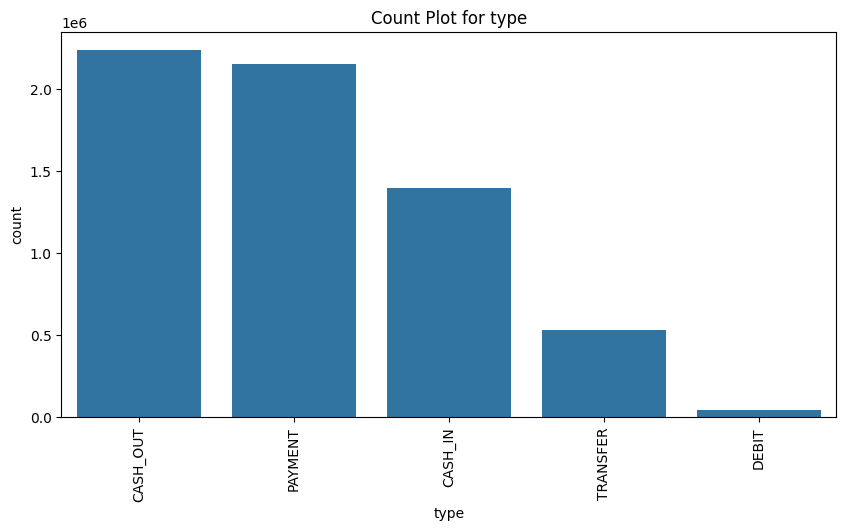

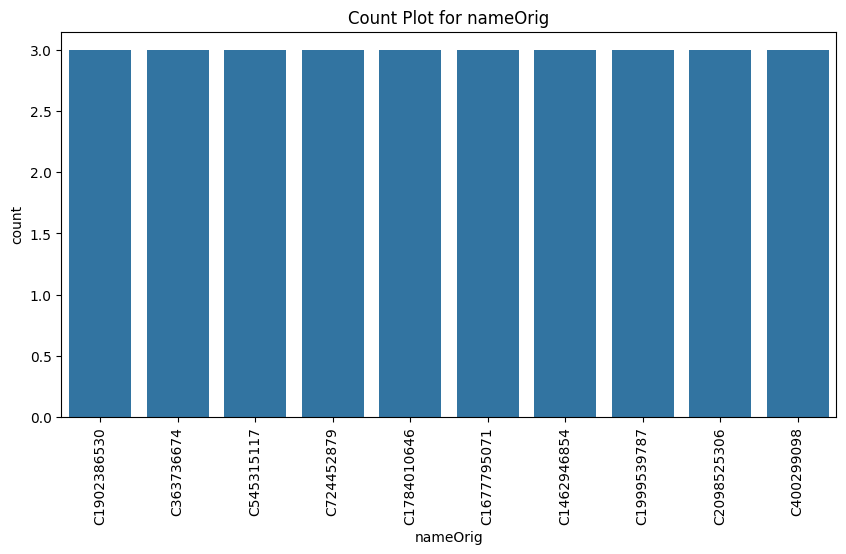

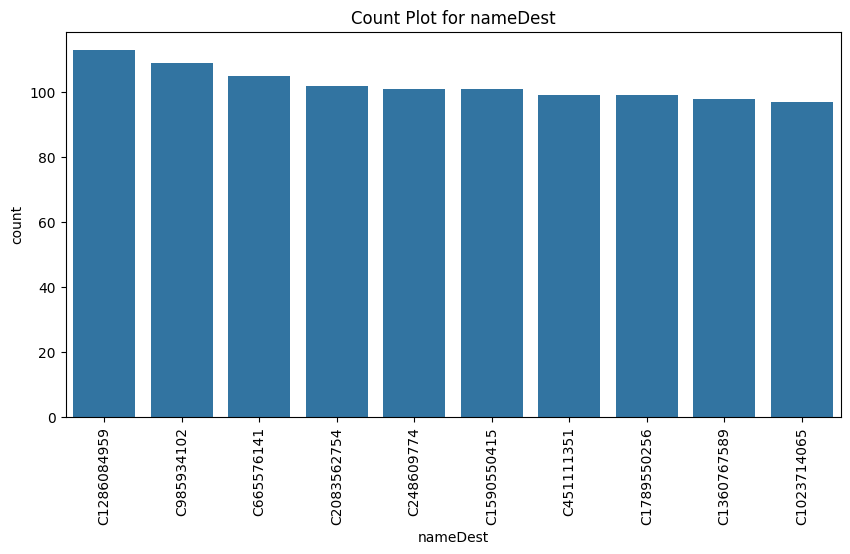

In [12]:
for column in df.columns:
    if df[column].dtype == 'object':  # Проверка, если столбец категориальный
        top_10_values = df[column].value_counts().head(10)  # Получаем 10 наиболее часто встречающихся значений
        plt.figure(figsize=(10, 5))  # Настройка размера фигуры
        sns.countplot(x=column, data=df, order=top_10_values.index)  # Используем 'data=df'
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Поворот меток по оси x, если они длинные
        plt.show()

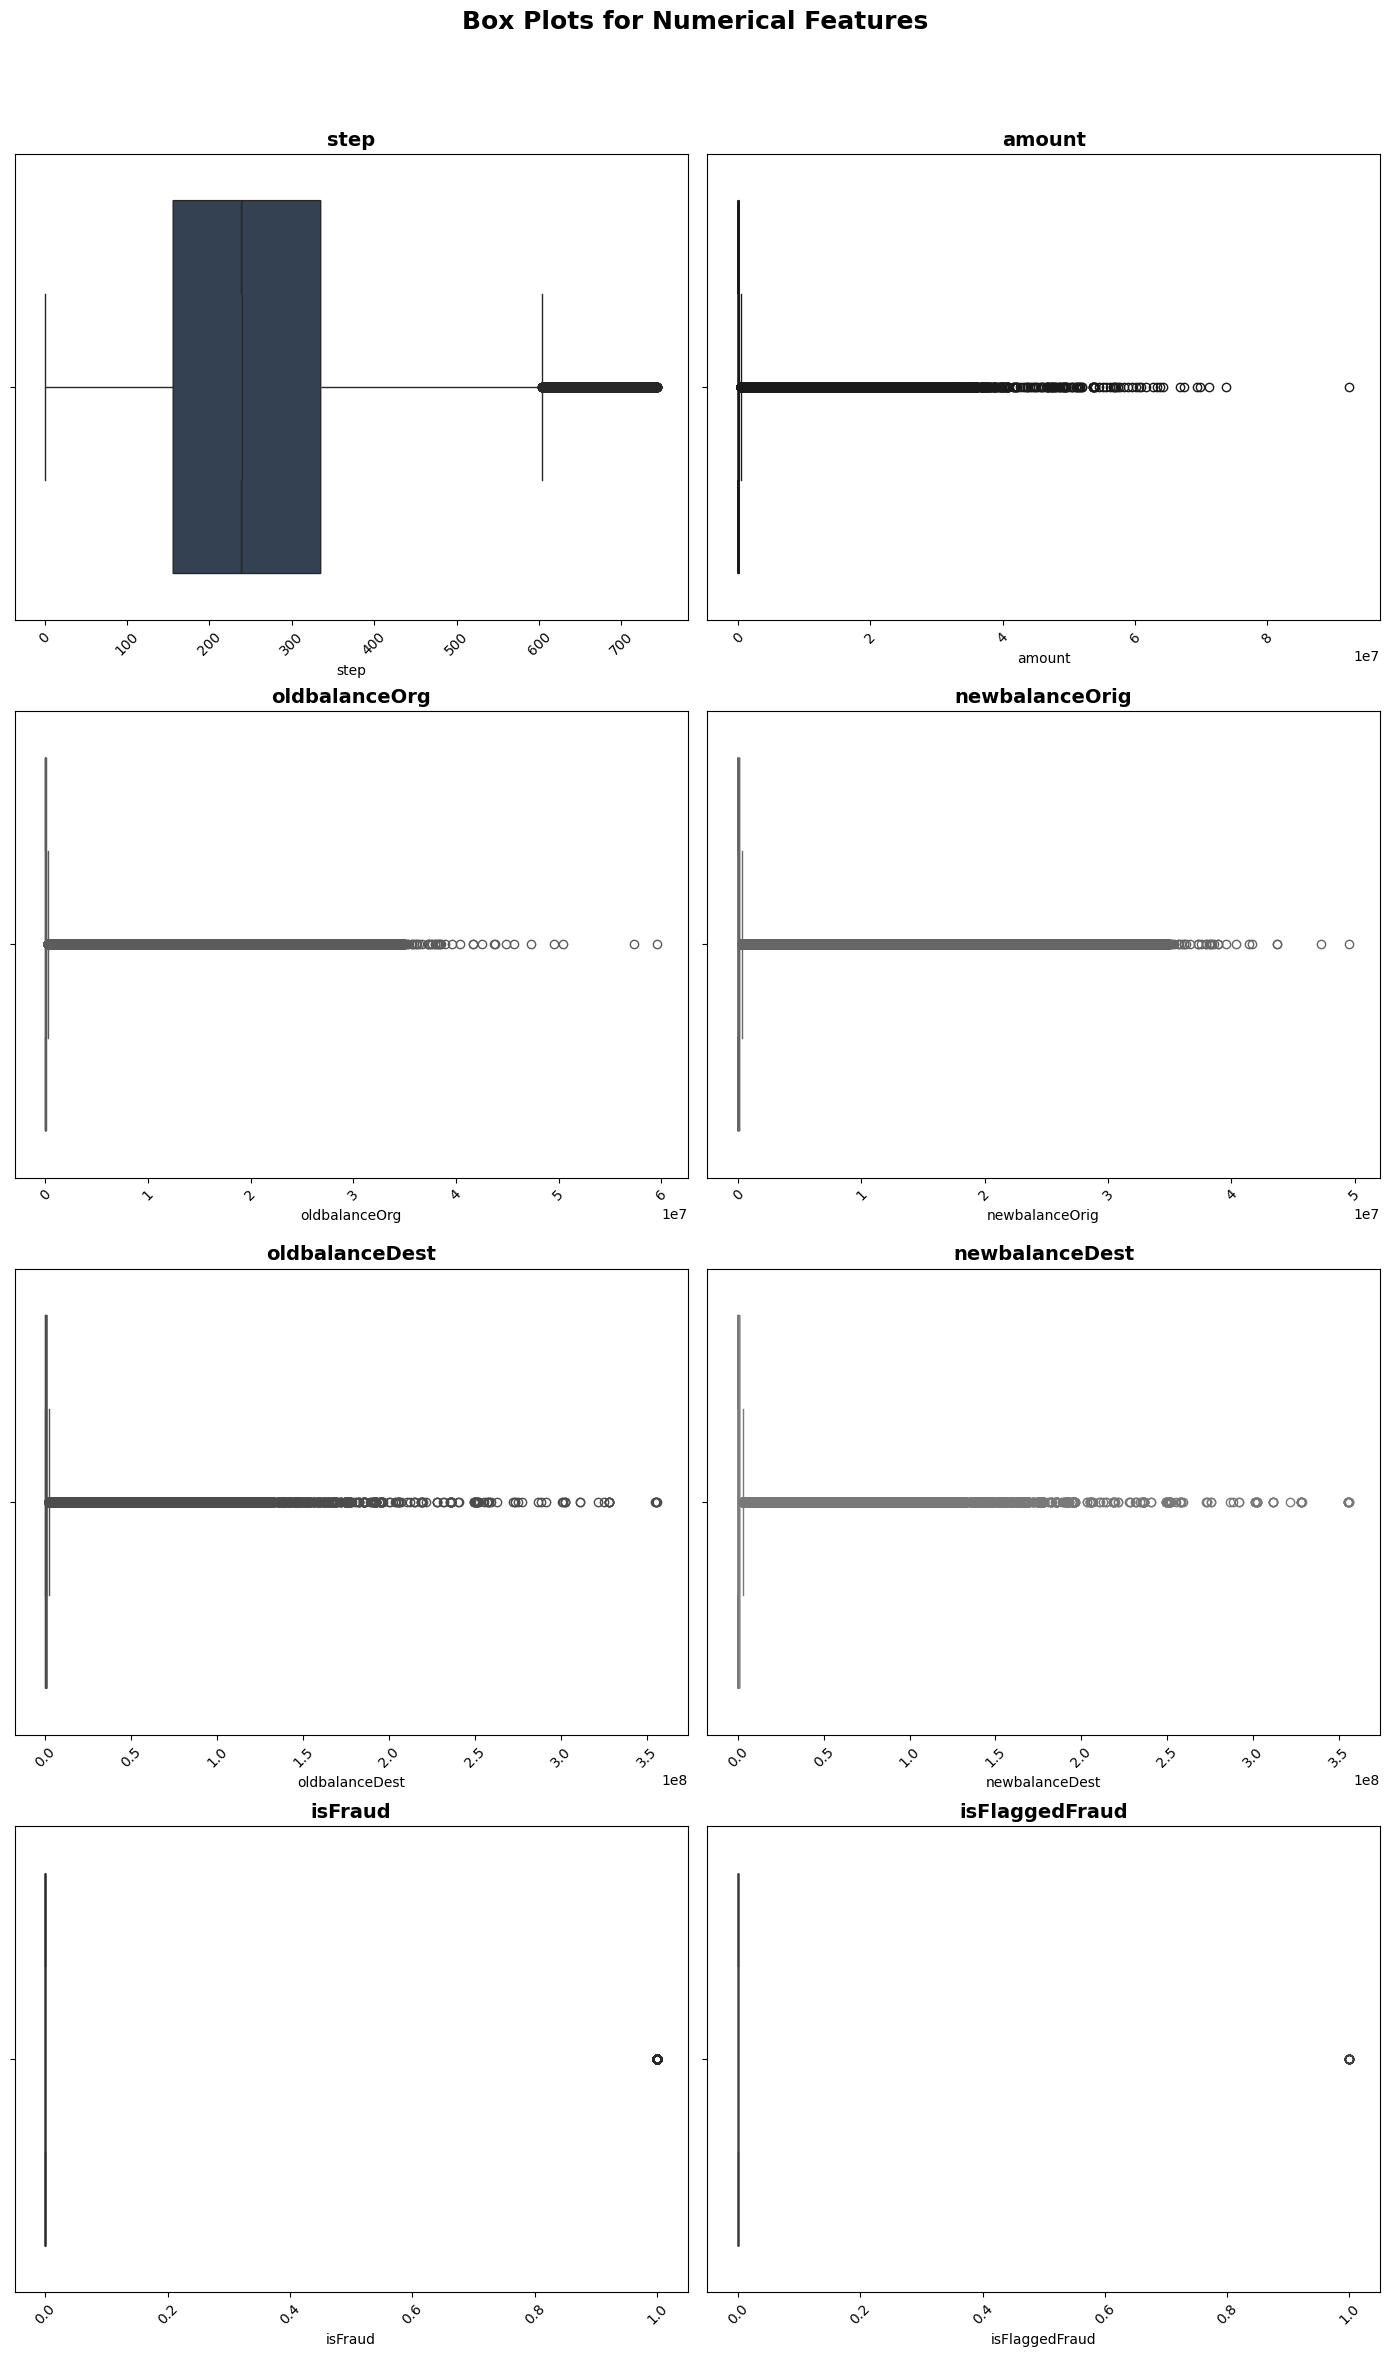

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = [
    "#2E4057", "#1B263B", "#FF6B35", "#FE5F55", "#D7263D",
    "#A2D5F2", "#077B8A", "#5C3C92", "#F7B32B", "#E0A458"
]

numeric_cols = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_cols)
num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(14, 6 * num_rows))
fig.suptitle("Box Plots for Numerical Features", fontsize=18, fontweight='bold')

for i, col in enumerate(numeric_cols):
    r, c = divmod(i, 2)
    sns.boxplot(x=df[col], ax=axes[r, c],
                color=custom_palette[i % len(custom_palette)],
                notch=True)
    axes[r, c].set_title(col, fontsize=14, fontweight='bold')
    axes[r, c].tick_params(axis='x', labelrotation=45)

if num_cols % 2:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11480\4285183201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFlaggedFraud', data=df, palette='Blues')


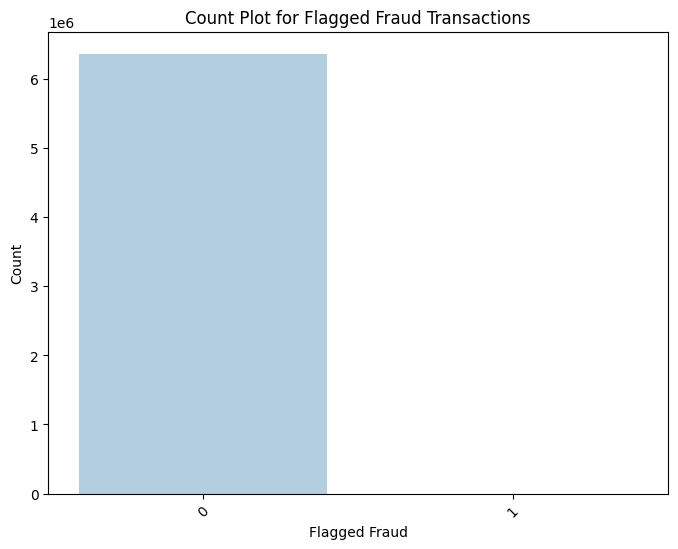

In [16]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='isFlaggedFraud', data=df, palette='Blues') 
plt.title('Count Plot for Flagged Fraud Transactions') 
plt.xlabel('Flagged Fraud') 
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

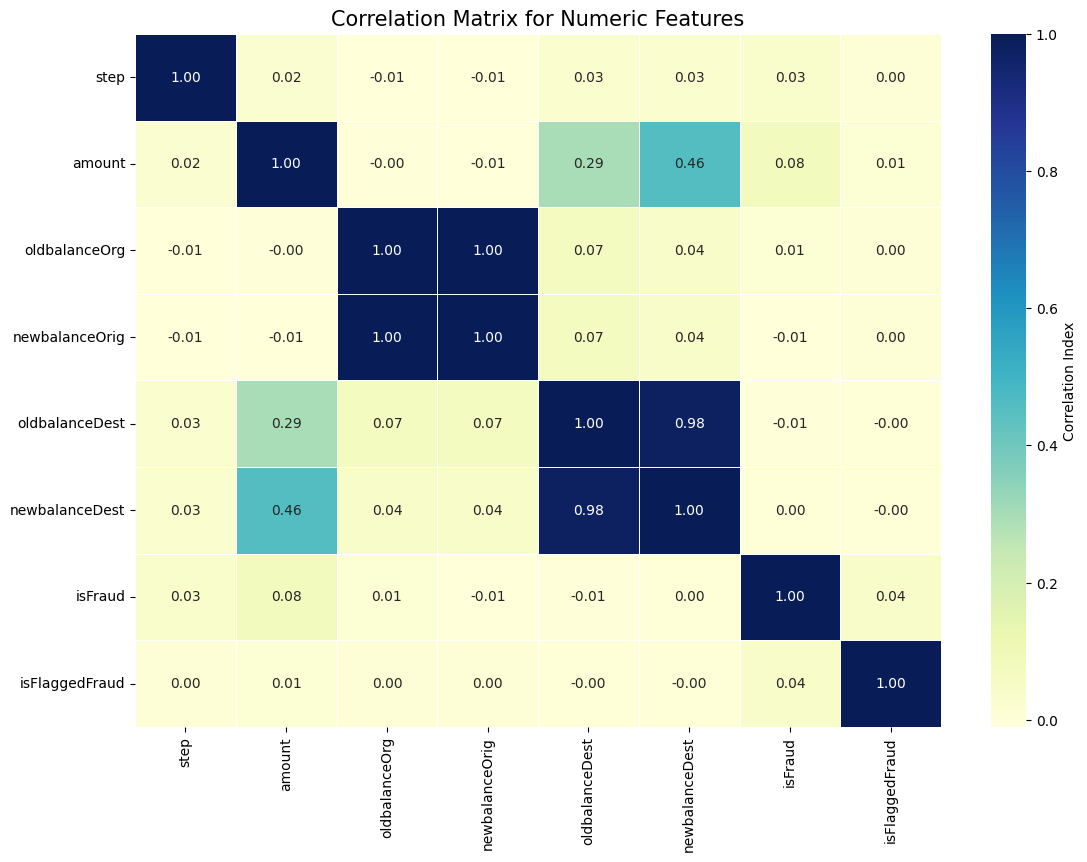

In [17]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(13, 9))  
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation Index'})
plt.title('Correlation Matrix for Numeric Features', fontsize=15) 

plt.show()